# 'open-visualizations' for repeated measures in Python

*Jordy van Langen*  
*11-03-2020*   
*jordy.vanlangen@sydney.edu.au*   

## Background

This tutorial is a follow up on my 'Rainclouds tutorial for repeated measures in R' and contributes to a GitHub repository called ['open-visualizations'](https://github.com/jorvlan/open-visualizations). 

If you have any questions, or suggestions for improvement, please open an issue in the GitHub repository [open-visualizations](https://github.com/jorvlan/open-visualizations). 

If you use my repository for your research, please reference it.

![DOI](https://zenodo.org/badge/239716316.svg) 



## Load libraries

In [1]:
from plotnine import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import random as random
# from random import seed
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# import scipy


# import ptitprince as pt
# import os
# import matplotlib.collections as clt

## Load the data

- For this tutorial we make use of the `iris` dataset which we can access in two ways.
   

In [2]:
# ------ Directly from URL ------ #
#url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv"

#iris_df_2 = pd.read_csv(url)
#iris_df_2

# ------ Locally ------ #
path = "/Users/jordyvanlangen/Downloads/iris.csv"

iris_df = pd.read_csv(path)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Manipulate the data
- The original iris dataset will be manipulated in the same way as in the [R tutorial](https://github.com/jorvlan/open-visualizations/blob/master/R/raincloud_repmes_tutorial_R.pdf).

In [83]:
# ------ Create two variables ------ #
before = iris_df['sepal_length'].iloc[0:50]
after = iris_df['sepal_length'].iloc[50:100]
n = len(before)

# ------ Create variable x indicating the conditions  ------ #
x = np.array([1, 2])
x = np.repeat(x, [n, n])
x = pd.DataFrame(x, columns = ['x'])

# ------ Create variable y containing the values ------ #
y_array = np.array([before, after])

y1_50_df = pd.DataFrame(y_array[0], columns = ['y'])
y51_100_df = pd.DataFrame(y_array[1], columns = ['y'])

frames = [y1_50_df, y51_100_df]
frames
y = pd.concat((frames), ignore_index = True)
y
# ------ Define the grouping variable 'id'  ------ #
s1 = pd.Series(range(1,51), dtype="category")
s2 = pd.Series(range(1,51), dtype="category")

s1_s2 = pd.concat([s1, s2], ignore_index = True)

id_df = pd.DataFrame(s1_s2, columns = ['id'])

# ------ Merge the dataframes together ------ #
d = pd.concat([y,x,id_df], axis=1)

pd.options.display.float_format = '{:.3f}'.format
print("The manipulated dataframe with 3 columns ")
print(d[['y', 'x', 'id']])

The manipulated dataframe with 3 columns 
       y  x  id
0  5.100  1   1
1  4.900  1   2
2  4.700  1   3
3  4.600  1   4
4  5.000  1   5
..   ... ..  ..
95 5.700  2  46
96 5.700  2  47
97 6.200  2  48
98 5.100  2  49
99 5.700  2  50

[100 rows x 3 columns]


## Figure 1

In [84]:
# ------ Define pre-settings  ------ #
labels = ['Before', 'After']

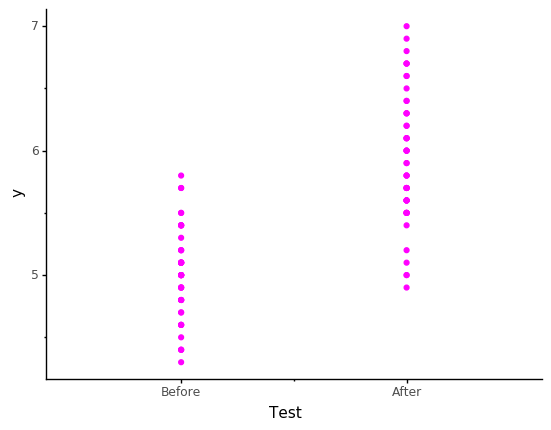

<ggplot: (-9223372029312602010)>

In [85]:
(
    ggplot(d) 
    + geom_point(aes(x='x', y = 'y'), color = 'magenta') 
    + theme_classic()
    + scale_x_continuous(breaks=(1, 2), labels = labels, limits = (0.5,2.5))
    + xlab('Test')
)

## Figure 2

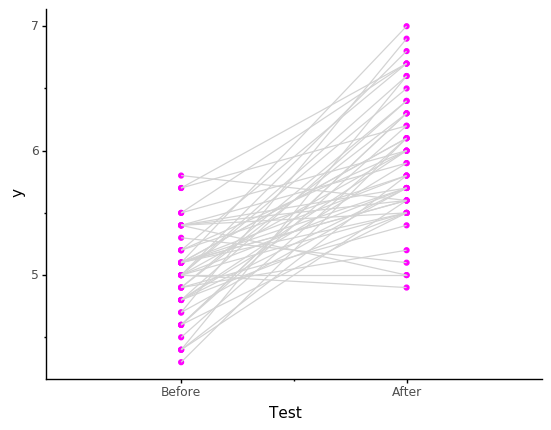

<ggplot: (-9223372029312231848)>

In [86]:
(
    ggplot(d) 
    + geom_point(aes(x='x', y = 'y'), color = 'magenta') 
    + geom_line(aes(x='x', y = 'y', group='id'), color = 'lightgray')
    + theme_classic()
    + scale_x_continuous(breaks=(1, 2), labels = labels, limits = (0.5,2.5))
    + xlab('Test')
)

## Figure 3

First we have to create a new variable that contains jitter along the x-axis.

In [94]:
# ------ Create two variables ------ #
np.random.seed(321)
xj = np.random.normal(1, 0.05, len(d['x'].iloc[0:50]))

np.random.seed(321)
xj_2 = np.random.normal(2, 0.05, len(d['x'].iloc[0:50]))

array([2.00862597, 2.08177413, 2.00186682, 1.95579252, 1.94284039,
       1.9689317 , 1.93256752, 1.95901345, 1.99328731, 2.07998   ,
       1.98581982, 1.97468301, 2.00344542, 2.07261298, 1.91804522,
       1.98436703, 1.95643668, 1.97716588, 1.99387666, 1.97744688,
       1.94538581, 1.93189102, 1.99170065, 2.03226945, 2.04075368,
       1.99907202, 2.02166903, 2.01874183, 1.95554695, 2.02061371,
       1.94848381, 1.98293993, 1.89781067, 1.96311809, 2.06791502,
       1.98490503, 1.9783997 , 1.99307479, 2.01820909, 2.05157358,
       2.03883075, 1.99361866, 2.00489446, 1.92168346, 1.9818939 ,
       2.01064354, 2.01329673, 1.93013331, 2.00997429, 1.98845332])

In [102]:
# ------ Create two dataframes of those variables an put them together ------ #
xj_df = pd.DataFrame(xj, columns = ['xj'])
xj_2_df = pd.DataFrame(xj_2, columns = ['xj'])

frames_jit = [xj_df, xj_2_df]
frames_jit

[      xj
 0  1.009
 1  1.082
 2  1.002
 3  0.956
 4  0.943
 5  0.969
 6  0.933
 7  0.959
 8  0.993
 9  1.080
 10 0.986
 11 0.975
 12 1.003
 13 1.073
 14 0.918
 15 0.984
 16 0.956
 17 0.977
 18 0.994
 19 0.977
 20 0.945
 21 0.932
 22 0.992
 23 1.032
 24 1.041
 25 0.999
 26 1.022
 27 1.019
 28 0.956
 29 1.021
 30 0.948
 31 0.983
 32 0.898
 33 0.963
 34 1.068
 35 0.985
 36 0.978
 37 0.993
 38 1.018
 39 1.052
 40 1.039
 41 0.994
 42 1.005
 43 0.922
 44 0.982
 45 1.011
 46 1.013
 47 0.930
 48 1.010
 49 0.988,       xj
 0  2.009
 1  2.082
 2  2.002
 3  1.956
 4  1.943
 5  1.969
 6  1.933
 7  1.959
 8  1.993
 9  2.080
 10 1.986
 11 1.975
 12 2.003
 13 2.073
 14 1.918
 15 1.984
 16 1.956
 17 1.977
 18 1.994
 19 1.977
 20 1.945
 21 1.932
 22 1.992
 23 2.032
 24 2.041
 25 1.999
 26 2.022
 27 2.019
 28 1.956
 29 2.021
 30 1.948
 31 1.983
 32 1.898
 33 1.963
 34 2.068
 35 1.985
 36 1.978
 37 1.993
 38 2.018
 39 2.052
 40 2.039
 41 1.994
 42 2.005
 43 1.922
 44 1.982
 45 2.011
 46 2.013
 47 1.930


In [103]:
# ------ Use the concat function to merge them together ------ #
jit_df = pd.concat((frames_jit), ignore_index = True)
jit_df

,xj
0,1.009
1,1.082
2,1.002
3,0.956
4,0.943
...,...
95,2.011
96,2.013
97,1.930
98,2.010


In [105]:
# ------ Merge the dataframes together ------ #
d = pd.concat([y,x,id_df,jit_df], axis=1)

pd.options.display.float_format = '{:.3f}'.format
print("The manipulated dataframe with 4 columns including jitter ")
print(d[['y', 'x', 'id','xj']])

The manipulated dataframe with 4 columns including jitter 
       y  x  id    xj
0  5.100  1   1 1.009
1  4.900  1   2 1.082
2  4.700  1   3 1.002
3  4.600  1   4 0.956
4  5.000  1   5 0.943
..   ... ..  ..   ...
95 5.700  2  46 2.011
96 5.700  2  47 2.013
97 6.200  2  48 1.930
98 5.100  2  49 2.010
99 5.700  2  50 1.988

[100 rows x 4 columns]


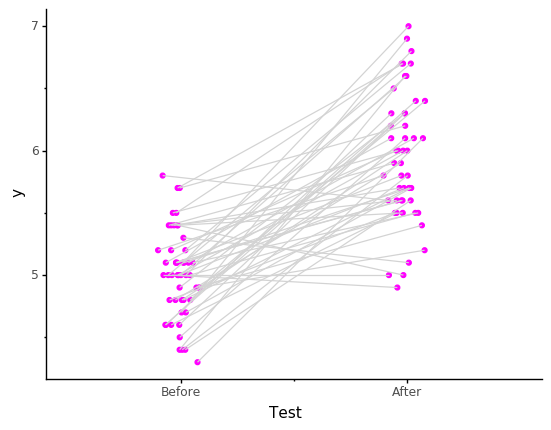

<ggplot: (-9223372036582430674)>

In [106]:
(
    ggplot(d) 
    + geom_point(aes(x='xj', y = 'y'), color = 'magenta') 
    + geom_line(aes(x='xj', y = 'y', group='id'), color = 'lightgray')
    + theme_classic()
    + scale_x_continuous(breaks=(1, 2), labels = labels, limits = (0.5,2.5))
    + xlab('Test')
)

## Figure 4

Let's color the variables according to their group: 'Before' and 'After.

In [ ]:
(
    ggplot(d) 
    + geom_point(aes(x='xj', y = 'y'), color = 'magenta') 
    + geom_line(aes(x='xj', y = 'y', group='id'), color = 'lightgray')
    + theme_classic()
    + scale_x_continuous(breaks=(1, 2), labels = labels, limits = (0.5,2.5))
    + xlab('Test')
)